$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Wind Speed Prediction Linear Regression Model

*Melinda Ryan and David Thorpe*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def train(X,T):
    means = np.mean(X,axis=0)
    stds = np.std(X,axis=0)
    Xs = standardize(X-means,stds)#(X - means) / stds
    Xs1 = np.hstack((np.ones((Xs.shape[0],1)), Xs))                
    w = np.linalg.lstsq( np.dot(Xs1.T,Xs1), np.dot(Xs1.T, T) )[0]
    return {'means': means, 'stds': stds, 'w': w}
    

In [3]:
def standardize(a,b):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.divide( a, b )
        c[ ~ np.isfinite( c )] = 0  # -inf inf NaN
    return c

In [4]:
def use(X,model):
    #Standardize data
    Xs = standardize(X-model['means'],model['stds'])#(X - model['means']) / model['stds']
    #bias 
    Xs1 = np.hstack((np.ones((Xs.shape[0],1)), Xs)) 
    prediction = np.dot(Xs1,model['w'])
    return prediction

In [5]:
def rmse(predict,T):
    return np.sqrt(np.mean((predict - T)**2,axis=0))

In [279]:
griddata = np.loadtxt('part-r-00000-1')

In [114]:
lats = griddata[:,15]/1000
lons = griddata[:,16]/1000

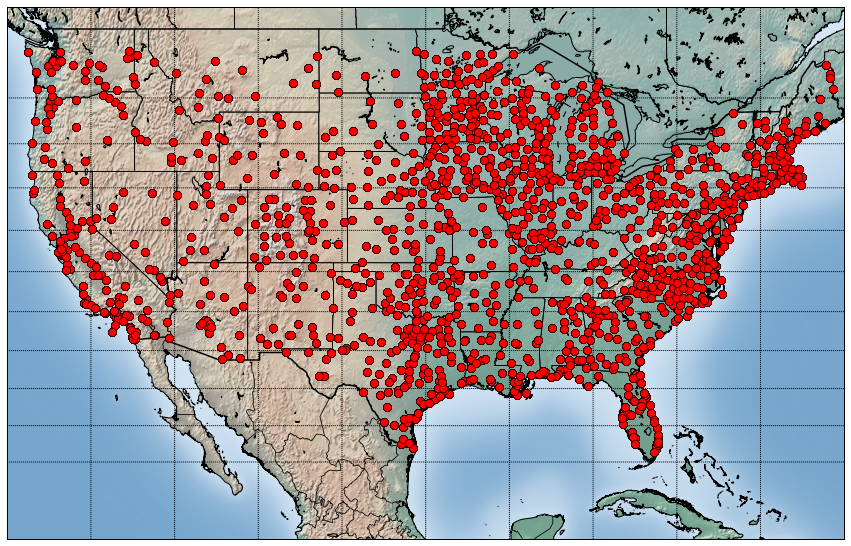

In [130]:
import mpl_toolkits.basemap as bm
plt.figure(figsize=(15,30))
m = bm.Basemap(projection='merc', lat_0=36.5, lon_0=-96.5, 
              resolution = 'h', area_thresh = 0.1, llcrnrlon=-126.0, llcrnrlat=20.0, urcrnrlon=-67.0, urcrnrlat=50.0)
m.shadedrelief()
m.drawcoastlines()
m.drawcountries(linewidth=1.5, linestyle='solid', color='k')
m.drawstates(linewidth=0.8, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
#m.fillcontinents(color='gray')
m.drawmapboundary()
m.drawmeridians(np.arange(-126,-67,5.9))
m.drawparallels(np.arange(25,48,2.3))

x,y = m(lons, lats)
m.plot(x,y, 'ro', markersize=8)
plt.show()

In [280]:
# Southern Rocky Mountain region is columns 2 and 3 in the grid
colSelection = np.logical_or(griddata[:,1]==2, griddata[:,1]==3)
rockies=griddata[colSelection,:]
# Southern Rocky Mountain region are rows 3,4,5,6 starting from the bottom up
rowSelection = np.logical_or(np.logical_or(rockies[:,0]==3, rockies[:,0]==4), 
                             np.logical_or(rockies[:,0]==5, rockies[:,0]==6))
rockies=rockies[rowSelection,:]

# Lats and lons in thousandths
lats = rockies[:,15]/1000
lons = rockies[:,16]/1000

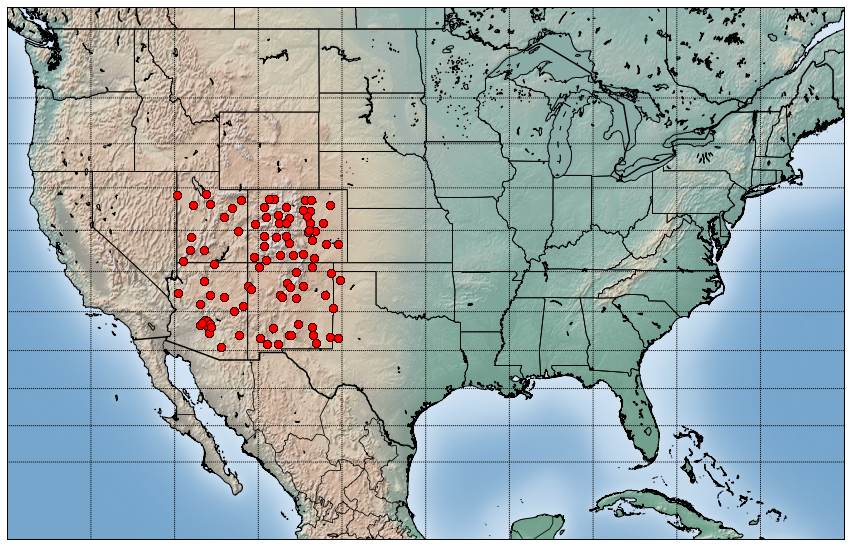

In [281]:
import mpl_toolkits.basemap as bm
plt.figure(figsize=(15,30))
m = bm.Basemap(projection='merc', lat_0=36.5, lon_0=-96.5, 
              resolution = 'h', area_thresh = 0.1, llcrnrlon=-126.0, llcrnrlat=20.0, urcrnrlon=-67.0, urcrnrlat=50.0)
m.shadedrelief()
m.drawcoastlines()
m.drawcountries(linewidth=1.5, linestyle='solid', color='k')
m.drawstates(linewidth=0.8, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
m.drawmapboundary()
m.drawmeridians(np.arange(-126,-67,5.9))
m.drawparallels(np.arange(25,48,2.3))

x,y = m(lons, lats)
m.plot(x,y, 'ro', markersize=8)
plt.show()

In [275]:
# South Central region are columns 4 and 5 in the grid also the section 3,2 is in this region.
colSCentral = np.logical_or(np.logical_or(griddata[:,1]==4, np.logical_and(griddata[:,1]==5,griddata[:,0]!=7)),
                         np.logical_and(griddata[:,1]==3,griddata[:,0]==2))
SCentral=griddata[colSCentral,:]
# Rockies region are rows 3,4,5,6 starting from the bottom up
rowSCentral = np.logical_or(np.logical_or(np.logical_or(SCentral[:,0]==0,SCentral[:,0]==1), 
                                       np.logical_or(SCentral[:,0]==2,SCentral[:,0]==3)),
                         np.logical_or(np.logical_or(SCentral[:,0]==4,SCentral[:,0]==5),
                                       np.logical_or(SCentral[:,0]==6,SCentral[:,0]==7)))
SCentral=SCentral[rowSCentral,:]

# Lats and lons in thousandths
lats = SCentral[:,15]/1000
lons = SCentral[:,16]/1000

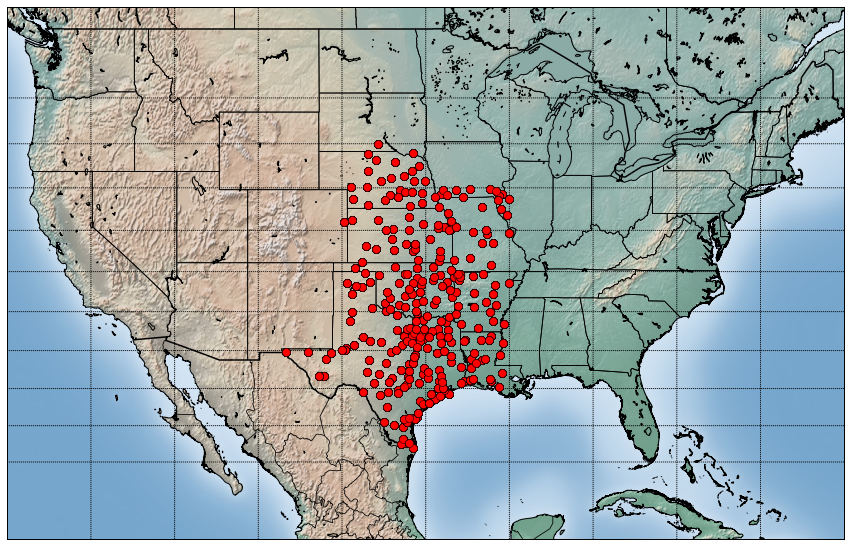

In [276]:
plt.figure(figsize=(15,30))
m = bm.Basemap(projection='merc', lat_0=36.5, lon_0=-96.5, 
              resolution = 'h', area_thresh = 0.1, llcrnrlon=-126.0, llcrnrlat=20.0, urcrnrlon=-67.0, urcrnrlat=50.0)
m.shadedrelief()
m.drawcoastlines()
m.drawcountries(linewidth=1.5, linestyle='solid', color='k')
m.drawstates(linewidth=0.8, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
m.drawmapboundary()
m.drawmeridians(np.arange(-126,-67,5.9))
m.drawparallels(np.arange(25,48,2.3))

x,y = m(lons, lats)
m.plot(x,y, 'ro', markersize=8)
plt.show()

In [277]:
# North Central region are columns 4 and 5 in the grid.
colNCentral = np.logical_or(griddata[:,1]==4, griddata[:,1]==5,)
NCentral=griddata[colNCentral,:]
# Rockies region are rows 7,8,9 starting from the bottom up
rowNCentral = np.logical_or(np.logical_or(NCentral[:,0]==7,NCentral[:,0]==8), NCentral[:,0]==9)
NCentral=NCentral[rowNCentral,:]

# Lats and lons in thousandths
lats = NCentral[:,15]/1000
lons = NCentral[:,16]/1000

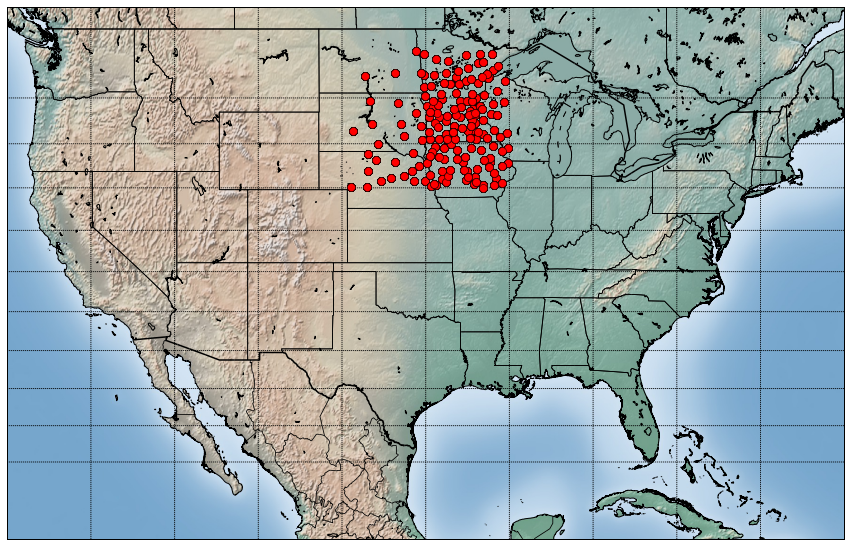

In [278]:
plt.figure(figsize=(15,30))
m = bm.Basemap(projection='merc', lat_0=36.5, lon_0=-96.5, 
              resolution = 'h', area_thresh = 0.1, llcrnrlon=-126.0, llcrnrlat=20.0, urcrnrlon=-67.0, urcrnrlat=50.0)
m.shadedrelief()
m.drawcoastlines()
m.drawcountries(linewidth=1.5, linestyle='solid', color='k')
m.drawstates(linewidth=0.8, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
m.drawmapboundary()
m.drawmeridians(np.arange(-126,-67,5.9))
m.drawparallels(np.arange(25,48,2.3))

x,y = m(lons, lats)
m.plot(x,y, 'ro', markersize=8)
plt.show()

In [292]:
Xtest = griddata[:,5:19]
Xtest.shape

(263548, 13)

In [293]:
names=['yearmoda','temp','dewp','slp','stp', 'visib','max','min','prcp','sndp','lat','lon','elev']

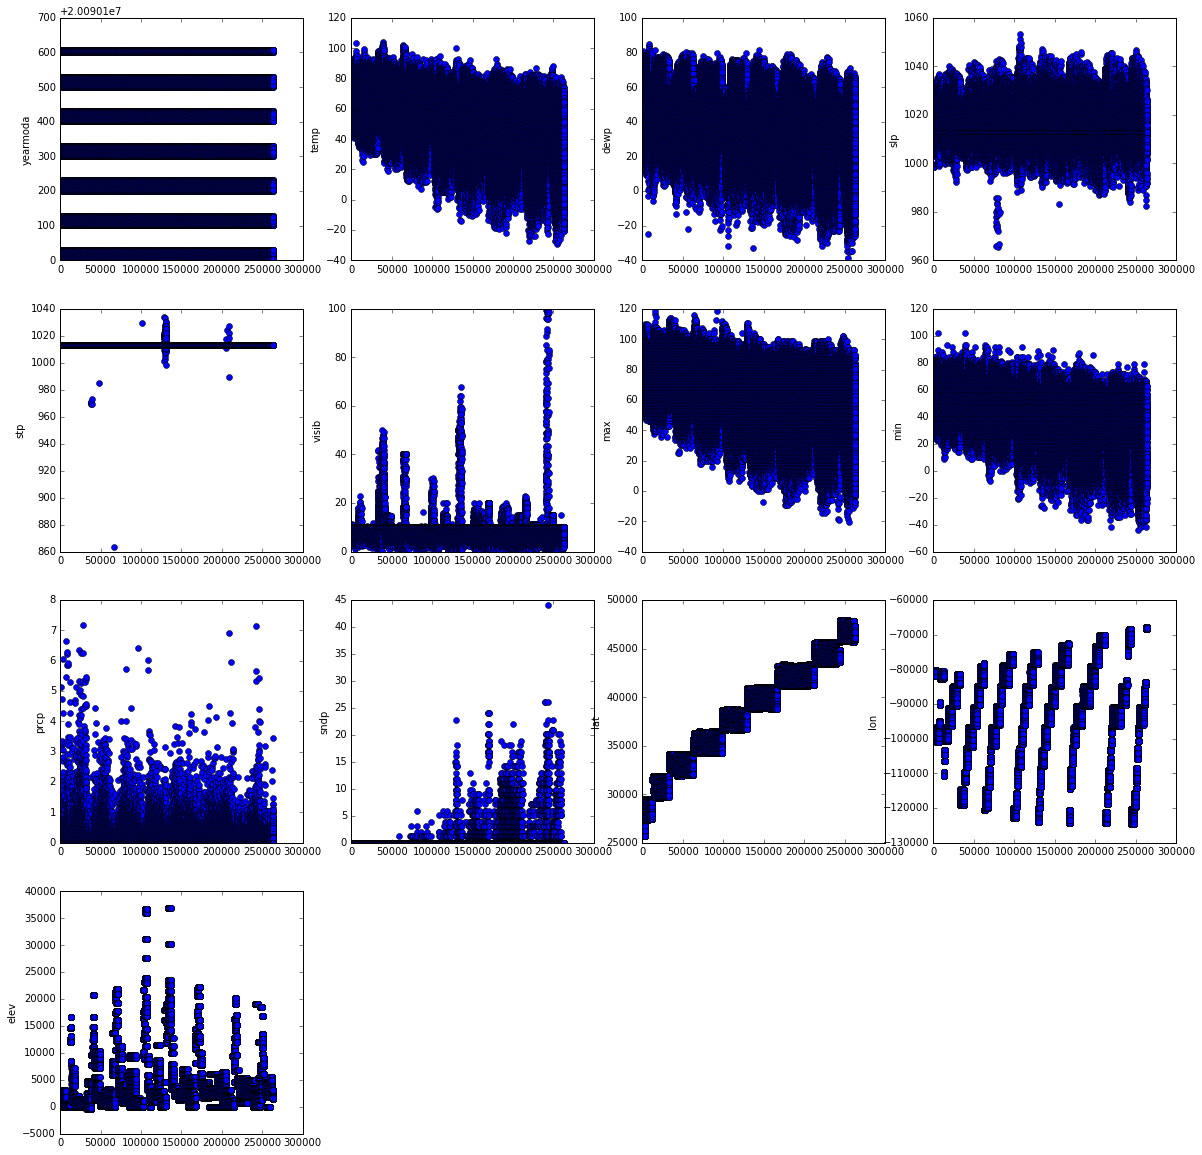

In [294]:
plt.figure(figsize=(20,20))
row,col = Xtest.shape
for i in range(col):
    plt.subplot(4,4, i+1)
    plt.plot(Xtest[:,i],'o')
    plt.ylabel(names[i])

In [295]:
Ttest=griddata[:,2:3]
Ttest.shape

(263548, 1)

In [296]:
testModel = train(Xtest,Ttest)
testPrediction = use(Xtest,testModel)

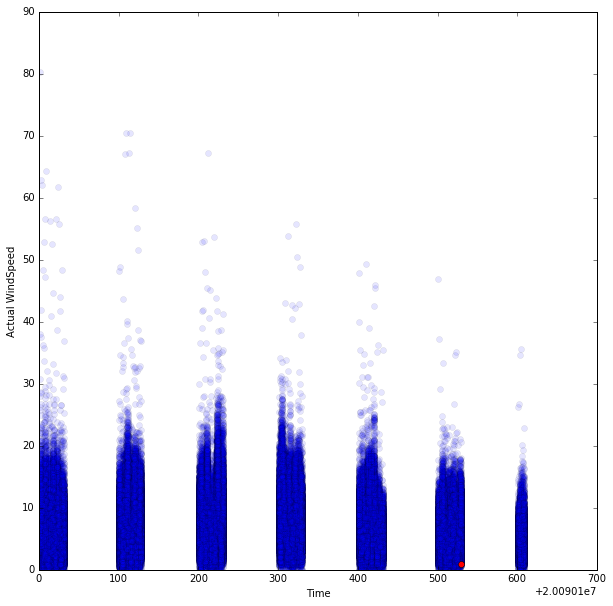

In [110]:
plt.figure(figsize=(10,10))
plt.plot(data[:,3:4],Ttest,'o',alpha=0.1)
plt.plot(20090630,1,'ro',alpha=1)
plt.xlabel('Time')
plt.ylabel('Actual WindSpeed')

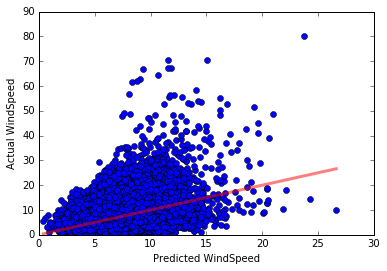

In [301]:
plt.plot(testPrediction,Ttest,'o')
plt.xlabel('Predicted WindSpeed')
plt.ylabel('Actual WindSpeed')
# add a 45 degree line
a = max(min(testPrediction),min(Ttest))
b = min(max(testPrediction),max(Ttest))
plt.plot([a,b],[a,b], 'r', linewidth=3,alpha=0.5);

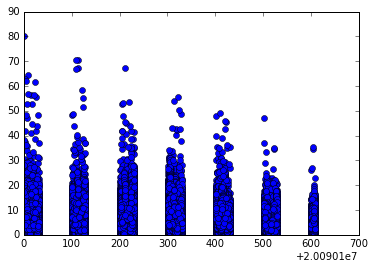

In [112]:
plt.plot(Xtest[:,0:1],Ttest,'o')

In [297]:
error = rmse(testPrediction,Ttest)
error

array([ 3.57683687])

In [298]:
w = testModel['w']

In [299]:
for wi,name in zip(w.flat,names):
    print('{:8.3f}  {:s}'.format(wi,name))

   6.811  yearmoda
  -0.654  temp
  -2.527  dewp
  -1.836  slp
  -0.695  stp
  -0.016  visib
   0.229  max
  -0.030  min
   4.436  prcp
   0.173  sndp
   0.227  lat
   0.133  lon
   0.006  elev
